In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
total_analysts = 14
analyst_chance = 0.156
min_job_time = 15.7
max_job_time = 33.1
node_capacity = 72
node_cost = 130
third_node_cost = 110

def get_maximum_cost():
    maximum_use = total_analysts * max_job_time; 
    maximum_nodes = maximum_use / node_capacity
    maximum_cost = 0
    
    for i in range(math.ceil(maximum_nodes)):
        if i < 2:
            maximum_cost += node_cost
        else:
            maximum_cost += third_node_cost

    print("Maximum cost for 1 day",maximum_cost)
    
get_maximum_cost()

Maximum cost for 1 day 810


In [8]:
def get_daily_cost():
    
    nodes_in_use = 0
    day_cost = 0

    for j in range(total_analysts):
        analyst_has_to_work = np.random.random()
        
        if analyst_has_to_work <= analyst_chance:
            job_time = np.random.uniform(min_job_time, max_job_time)
            nodes_in_use = nodes_in_use + (job_time/node_capacity)
            
    for i in range(math.ceil(nodes_in_use)):
        if i < 2:
            day_cost += node_cost
        else:
            day_cost += third_node_cost

    return day_cost
        

def get_montecarlo_costs(num_trials: int):
    costs = []
    for i in range(num_trials):
        costs.append(get_daily_cost())

    return costs

week_cost = 0
for h in range(5):
    day_cost = get_daily_cost()
    week_cost = week_cost + day_cost

    
print("week cost", week_cost)
    

week cost 390


COSTES DIARIOS SOBRE 10000
coste medio 155.129
coste máximo 480


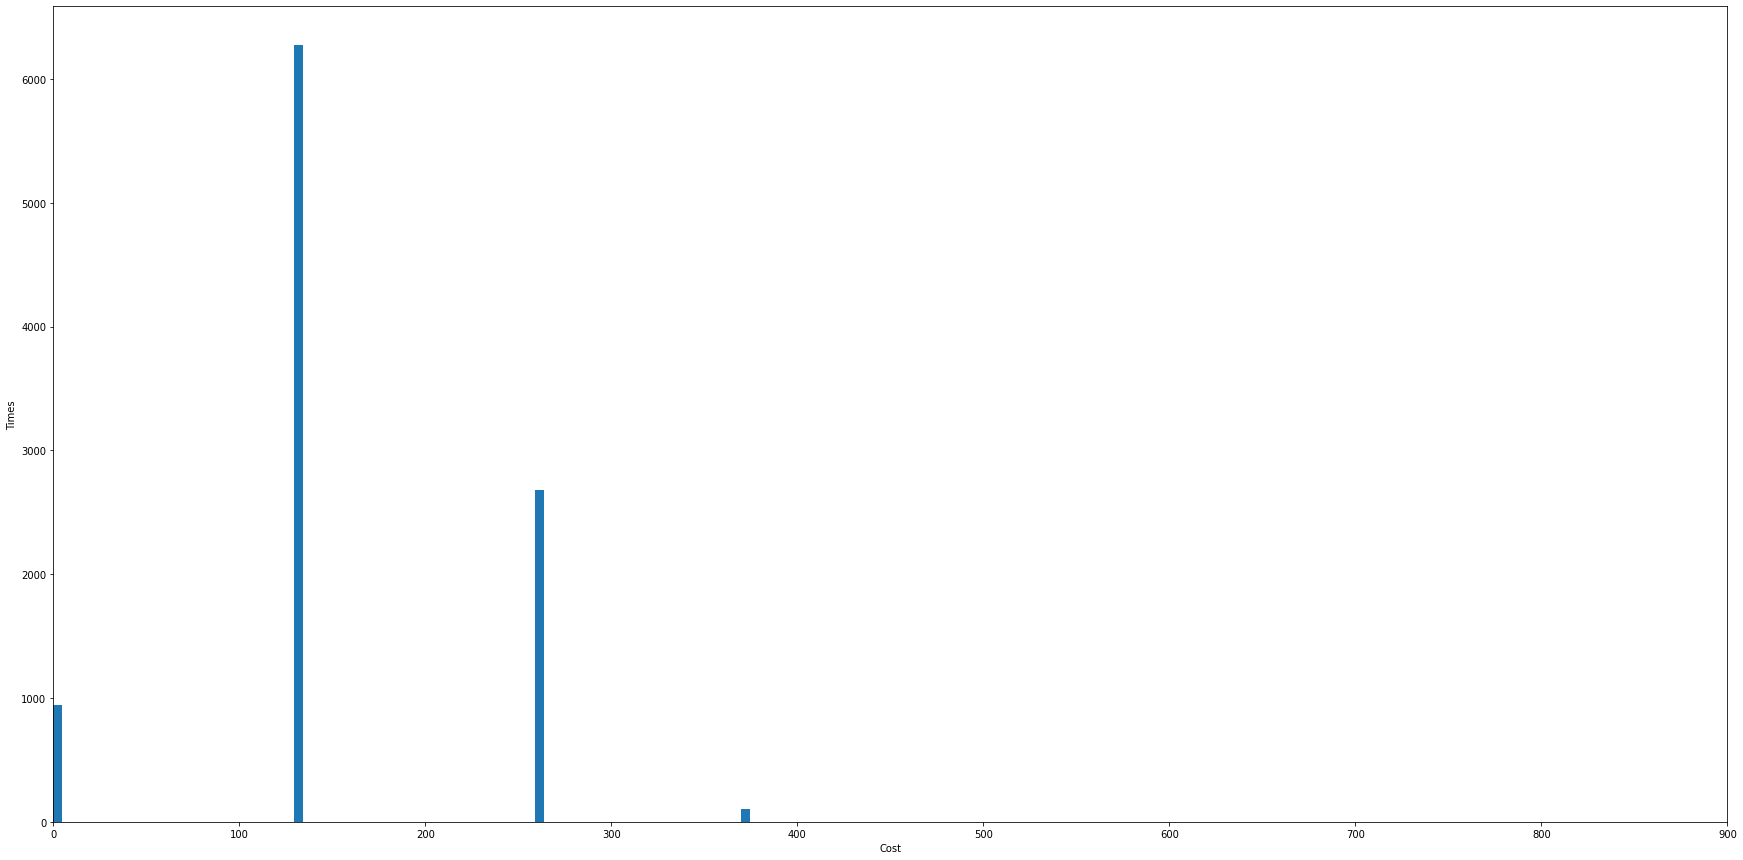

In [9]:
result = get_montecarlo_costs(10000)

plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.xlim(0,900)
_ = plt.hist(result, bins=100)

print("COSTES DIARIOS SOBRE 10000")
print("coste medio", sum(result) / len(result))
print("coste máximo", max(result))

COSTES SEMANALES (100 x 10)
coste mínimo 130
coste máximo 1410
coste medio 777.91
Semanas caras (> 900) 32.94 %


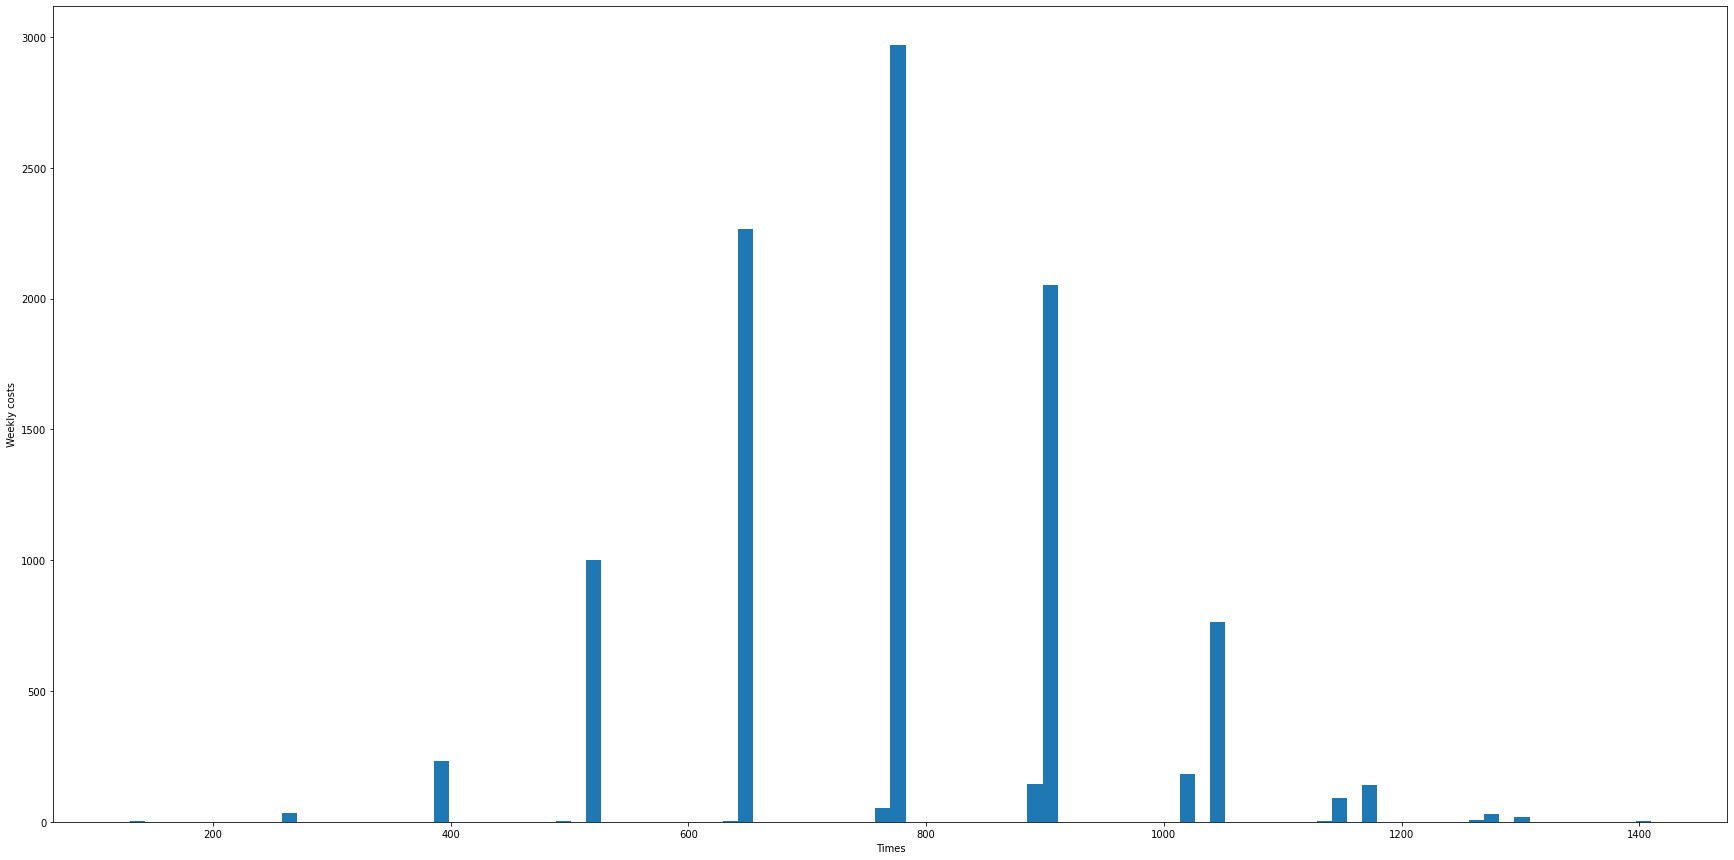

In [20]:
weeks = []

for j in range(10000):
    weekcost = 0
    for i in range(5):
        weekcost = weekcost + get_daily_cost()

    weeks.append(weekcost)

print("COSTES SEMANALES (100 x 10)")
print("coste mínimo", round(min(weeks), 2))
print("coste máximo", round(max(weeks), 2))
print("coste medio", round(sum(weeks) / len(weeks), 2))
    
plt.figure(figsize=(30, 15))
plt.xlabel('Times')
plt.ylabel('Weekly costs')
_ = plt.hist(weeks, bins=100)

expensive_weeks = []
for week in weeks:
    if week > 900:
        expensive_weeks.append(week)

print('Semanas caras (> 900)', len(expensive_weeks) * 100 / len(weeks), "%")

COSTES SEMANALES (100 x 1000)
coste mínimo 759.9
coste máximo 788.16
coste medio 776.62


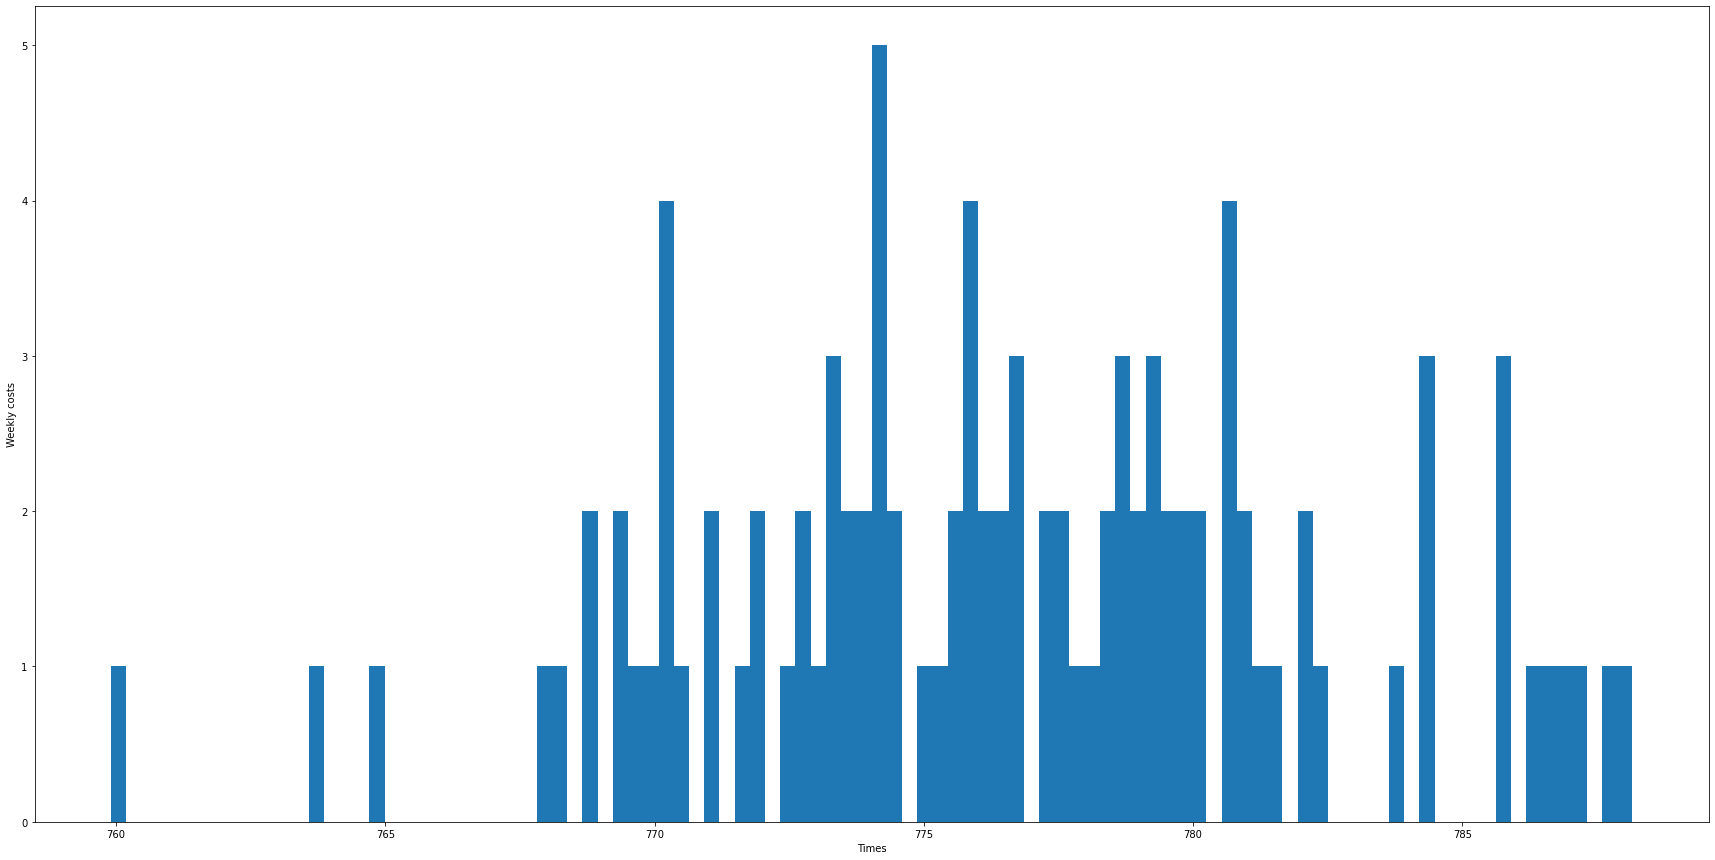

In [13]:
weeks = []

for j in range(100):
    weekcost = 0
    for i in range(5):
        result = get_montecarlo_costs(1000)
        weekcost = weekcost + (sum(result) / len(result))

    weeks.append(weekcost)

print("COSTES SEMANALES (100 x 1000)")
print("coste mínimo", round(min(weeks), 2))
print("coste máximo", round(max(weeks), 2))
print("coste medio", round(sum(weeks) / len(weeks), 2))
    
plt.figure(figsize=(30, 15))
plt.xlabel('Times')
plt.ylabel('Weekly costs')
_ = plt.hist(weeks, bins=100)

In [263]:
def get_job_time_by_chance():
    
    job_time = 0

    for j in range(total_analysts):
        analyst_has_to_work = np.random.random()
        
        if analyst_has_to_work <= analyst_chance:
            job_time = job_time + np.random.uniform(min_job_time, max_job_time)
            
    return job_time

def get_motecarlo_time(num_trials: int):
    jobtime = []
    for i in range(num_trials):
        jobtime.append(get_job_time_by_chance())

    return jobtime

result = get_motecarlo_time(100)
#print(result)
average_daily_job = round(sum(result) / len(result), 2)
print("tiempo medio diario", average_daily_job)

print("90%",average_daily_job*0.9)



tiempo medio diario 53.3
90% 47.97
